# Homework 5

PART I - Run the model

Import the required libraries

In [34]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
!pip install easyocr --no-deps

In [3]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2

In [4]:
pip install python-bidi

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
import cv2
import os
import glob
import keras
from random import sample, randint

from sklearn.model_selection import train_test_split

from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
import easyocr

from lxml import etree

Load the images dataset

In [24]:
for dirName, _, fileNames in os.walk(r'C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\images'):
    for fileName in fileNames:
        print(os.path.join(dirName, fileName))

C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\images\Cars0.png
C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\images\Cars1.png
C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\images\Cars10.png
C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\images\Cars100.png
C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\images\Cars101.png
C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\images\Cars102.png
C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\images\Cars103.png
C:\Users\pr

Load the annotations dataset

In [19]:
for dirName, _, fileNames in os.walk(r'C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\annotations'):
    for fileName in fileNames:
        print(os.path.join(dirName, fileName))

C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\annotations\Cars0.xml
C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\annotations\Cars1.xml
C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\annotations\Cars10.xml
C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\annotations\Cars100.xml
C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\annotations\Cars101.xml
C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\annotations\Cars102.xml
C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\

Read the images as multidimentional arrays into a list X

IMAGE_SIZE = 200

img_dir = r"C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\images"
data_path = os.path.join(img_dir,'*g')

files = glob.glob(data_path)
files.sort()

X=[]
for f1 in files:
    img = cv2.imread(f1)
    img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    X.append(np.array(img))


Set the four bounding points for annotations

In [6]:
def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text) / (width / IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text) / (height / IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text) / (width / IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text) / (height / IMAGE_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]

In [ ]:
Store them in list y

In [28]:
path = r"C:/Users/prave/Desktop/docs/FA/New folder/New folder/DMT/Assignment 05 - Neural Networks and Evaluating Results/New folder/annotations/"
text_files = [r'C:/Users/prave/Desktop/docs/FA/New folder/New folder/DMT/Assignment 05 - Neural Networks and Evaluating Results/New folder/annotations/'+ f for f in sorted(os.listdir(path))]

y=[]
for i in text_files:
    y.append(resizeannotation(i))

Display 9 sample resized images

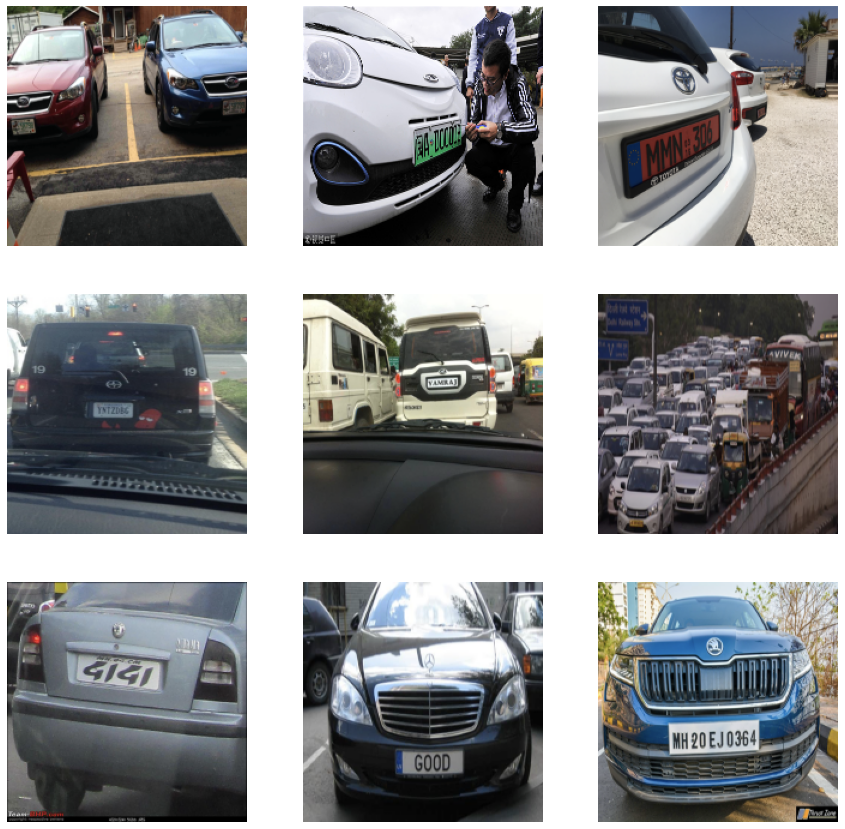

In [ ]:
sample_index = []

for i in range(9):
    sample_index.append(randint(0, len(X)))

plt.figure(figsize=(15, 15))
for index, i in enumerate(sample_index):
    plt.subplot(3, 3, index + 1)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB))

Display the shape of X ( has 433 images of size 200x200 with RGB- 3dimensions each) and y (has 433 annotations with four bounding values)

In [29]:
print(f"X Shape : {np.array(X).shape}")
print(f"y Shape : {np.array(y).shape}")

X Shape : (433, 200, 200, 3)
y Shape : (433, 4)


Show the boundaries for Number plates using the annotation values from dataset

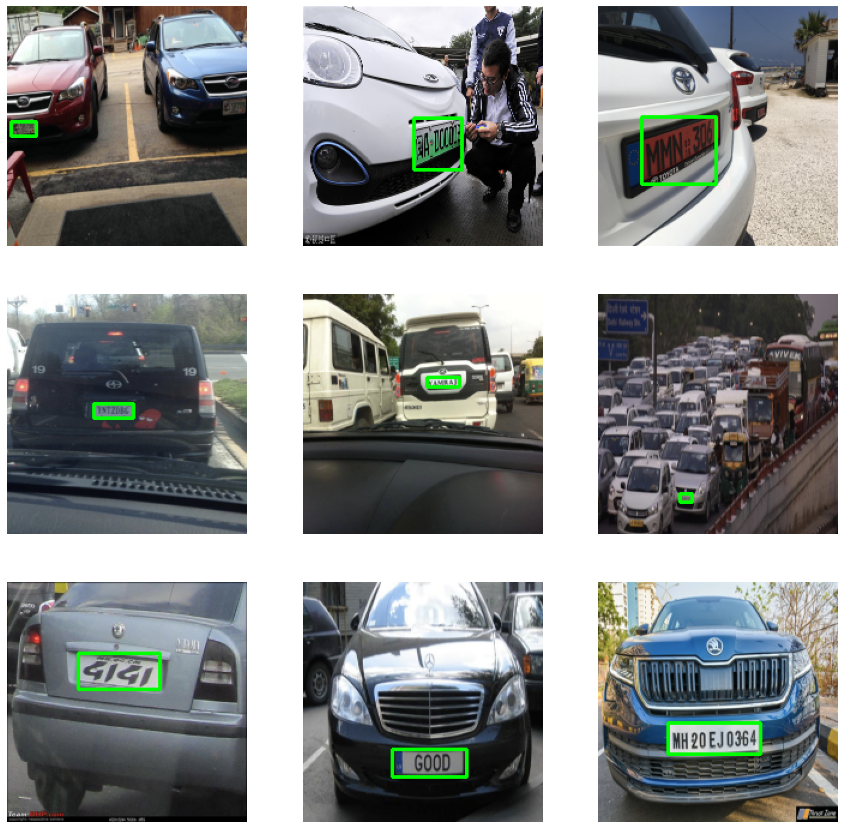

In [ ]:
plt.figure(figsize=(15, 15))
for index, i in enumerate(sample_index):
    plt.subplot(3, 3, index + 1)
    image = cv2.rectangle(cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB),(y[i][0],y[i][1]),(y[i][2],y[i][3]),(0, 255, 0), 2)
    plt.imshow(image)
    plt.axis("off")

plt.show()

Displayed twice just to check if it works fine

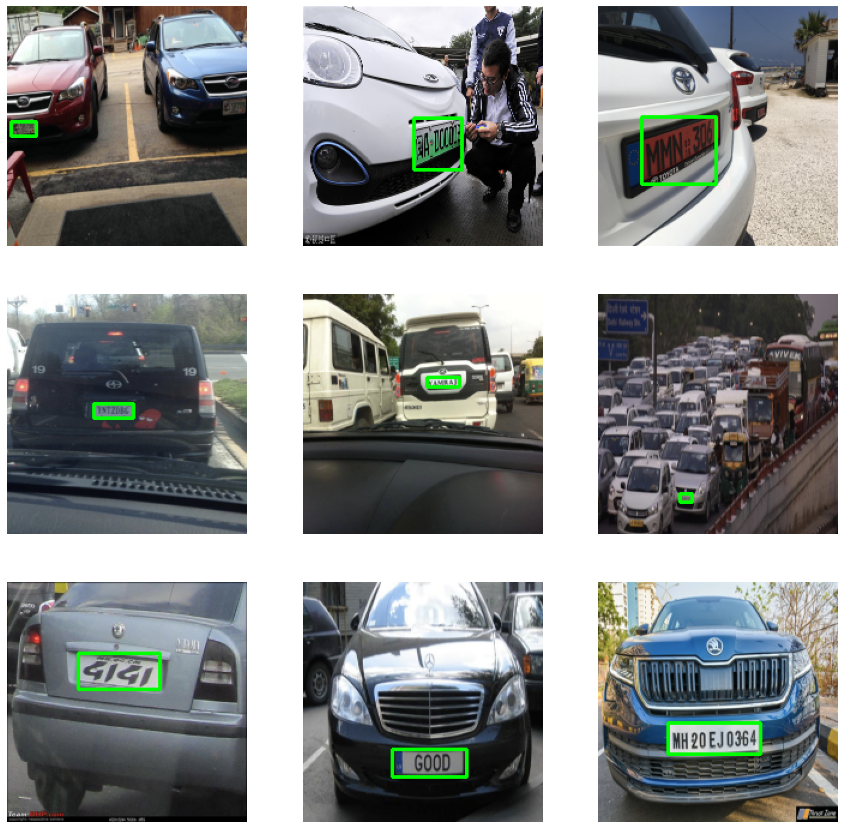

In [ ]:
plt.figure(figsize=(15, 15))
for index, i in enumerate(sample_index):
    plt.subplot(3, 3, index + 1)
    image = cv2.rectangle(cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB),(y[i][0],y[i][1]),(y[i][2],y[i][3]),(0, 255, 0), 2)
    plt.imshow(image)
    plt.axis("off")

plt.show()


This is how the values stored in y look like

In [30]:
for i in range(9):
    print(y[i])

[167, 129, 90, 93]
[131, 129, 67, 103]
[151, 131, 70, 4]
[107, 98, 87, 85]
[120, 146, 83, 134]
[184, 151, 37, 111]
[101, 123, 94, 118]
[97, 150, 78, 142]
[103, 132, 76, 122]


Split the dataset into train and test - 80-20 split

In [31]:
X = np.array(X)
y = np.array(y)

X = X / 255
y = y / 255

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1)

Describe the model and layers

In [ ]:
model = Sequential()
model.add(VGG19(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.layers[-7].trainable = False

model.summary()

80150528/80134624 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 6, 6, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dropout (Dropout)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 256)               4718848   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                         

Fit the model and run for 50 epochs

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=1)


Epoch 1/50
10/10 [==============================] - 178s 18s/step - loss: 0.0734 - accuracy: 0.3808 - val_loss: 0.0267 - val_accuracy: 0.4545
Epoch 2/50
10/10 [==============================] - 175s 18s/step - loss: 0.0177 - accuracy: 0.5596 - val_loss: 0.0151 - val_accuracy: 0.7045
Epoch 3/50
10/10 [==============================] - 175s 18s/step - loss: 0.0105 - accuracy: 0.6821 - val_loss: 0.0152 - val_accuracy: 0.4318
Epoch 4/50
10/10 [==============================] - 177s 18s/step - loss: 0.0075 - accuracy: 0.7450 - val_loss: 0.0151 - val_accuracy: 0.5455
Epoch 5/50
10/10 [==============================] - 176s 18s/step - loss: 0.0060 - accuracy: 0.7152 - val_loss: 0.0137 - val_accuracy: 0.6136
Epoch 6/50
10/10 [==============================] - 176s 18s/step - loss: 0.0045 - accuracy: 0.7185 - val_loss: 0.0143 - val_accuracy: 0.6364
Epoch 7/50
10/10 [==============================] - 176s 18s/step - loss: 0.0037 - accuracy: 0.7285 - val_loss: 0.0116 - val_accuracy: 0.5682
Epoch 

Plot the results

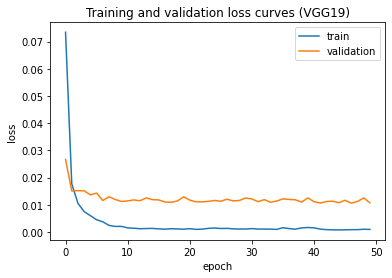

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss curves (VGG19)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

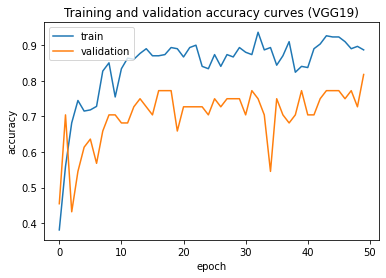

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy curves (VGG19)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


Find the accuracy and loss for test data

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test,steps=int(100))
y_cnn = model.predict(X_test)

print("")
print(f"Loss : {test_loss * 100}%")
print(f"Accuracy : {test_accuracy * 100}%")

100/100 [==============================] - 50s 496ms/step - loss: 0.0053 - accuracy: 0.8851

Loss : 0.5338858347386122%
Accuracy : 88.50574493408203%


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


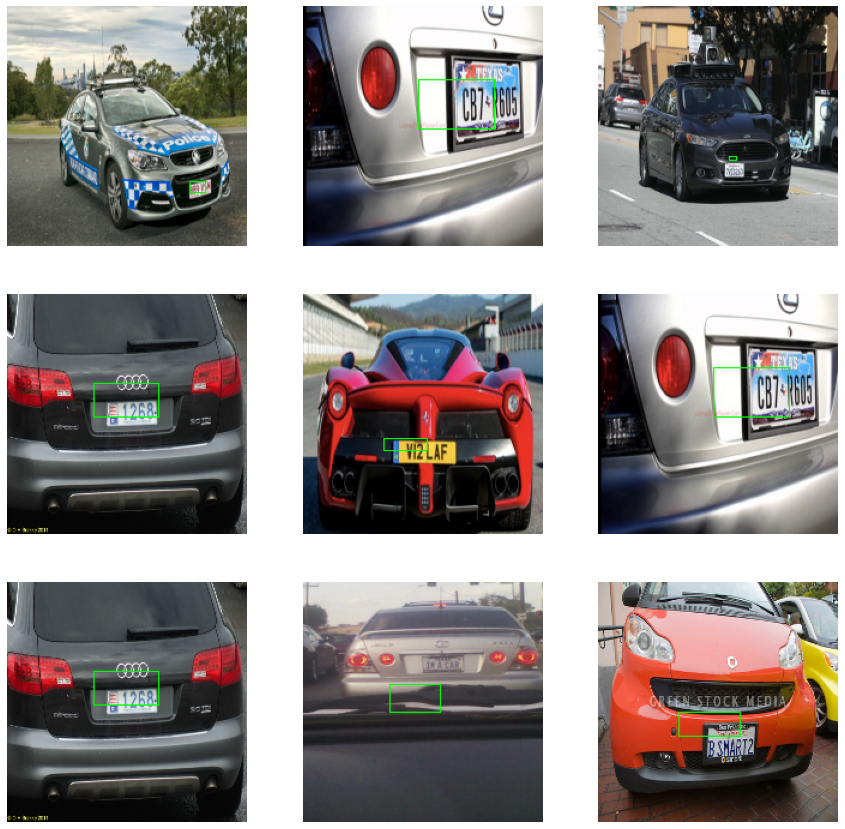

In [ ]:
sample_index = []

for i in range(9):
    sample_index.append(randint(0, len(X_test)))

text = easyocr.Reader(['en'])
plt.figure(figsize=(15, 15))
for index, i in enumerate(sample_index):
    plt.subplot(3, 3, index + 1)
    plt.axis('off')
    ny = np.copy(y_cnn[i])
    ny = ny * 255
    
    rgb_img = cv2.cvtColor(np.copy(X_test[i]).astype('float32'), cv2.COLOR_BGR2RGB)
    image = cv2.rectangle(rgb_img,(int(ny[0]),int(ny[1])),(int(ny[2]),int(ny[3])),(0, 255, 0))
    plt.imshow(image)
    
plt.show()

--------------------------------------------------------

PART II - Remove the duplicates

----------------------------------------------------------

In [33]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
import cv2
import os
import glob
import keras
from random import sample, randint

from sklearn.model_selection import train_test_split

from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
import easyocr

from lxml import etree

Load the annotations dataset

In [34]:
for dirName, _, fileNames in os.walk(r'C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\annotations'):
    for fileName in fileNames:
        print(os.path.join(dirName, fileName))


Load the images dataset and read the images as multidimentional arrays into X

In [35]:
from PIL import Image
from numpy import asarray

IMAGE_SIZE = 200

img_dir = r"C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\images"
data_path = os.path.join(img_dir,'*g')

files = glob.glob(data_path)
files.sort()

X=[]
#for f1 in files:
 #   print(f1)
for i in range(0, 433, 1):
    #img = cv2.imread(f1)
    img = cv2.imread(img_dir+'\Cars'+str(i)+'.png')
    img = cv2.resize(img, (200,200))
    X.append(np.array(img))
    #X.append(asarray(img))

In [36]:
X

[array([[[142, 115,  60],
         [162, 127,  47],
         [173, 147,  90],
         ...,
         [ 38,  39,  38],
         [ 44,  43,  42],
         [ 37,  36,  34]],
 
        [[132, 110,  58],
         [155, 121,  41],
         [141, 117,  65],
         ...,
         [ 49,  50,  50],
         [ 46,  47,  44],
         [ 36,  38,  35]],
 
        [[132, 114,  69],
         [154, 123,  45],
         [144, 126,  80],
         ...,
         [ 39,  39,  40],
         [ 50,  49,  46],
         [ 36,  37,  33]],
 
        ...,
 
        [[ 39,  47,  70],
         [ 40,  48,  71],
         [ 41,  49,  72],
         ...,
         [ 42,  61,  98],
         [ 46,  66, 100],
         [ 47,  68, 101]],
 
        [[ 43,  51,  74],
         [ 42,  50,  73],
         [ 40,  48,  71],
         ...,
         [ 44,  63, 100],
         [ 46,  65, 102],
         [ 48,  67, 104]],
 
        [[ 44,  52,  75],
         [ 41,  49,  72],
         [ 37,  45,  68],
         ...,
         [ 45,  64, 102],
  

Find the number of images and store in 'length' and display the shape of X
X- has 433 images of size 200x200 with RGB- 3dimensions each

In [37]:
xl = np.array(X).shape
length = xl[0]
length
np.array(X).shape

(433, 200, 200, 3)

Create a new dataframe with data from the License plate csv file

In [39]:
data = pd.read_csv(r'C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\LicensePlates - Country.csv')

Check if equating the image arrays work for given original duplicate image example

In [40]:
if(np.array_equal(np.array(X)[23,:],np.array(X)[29,:])):
  print(1)

1


Print an image to check if they are stored right

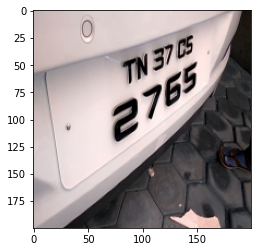

In [41]:
from matplotlib import image
from matplotlib import pyplot
image2 = Image.fromarray(np.array(X)[10,:])
pyplot.imshow(image2)
pyplot.show()

In [42]:
#print(np.array(X)[54,:])
np.array(X)[23,:].shape

(200, 200, 3)

The following code uses cv2 to check for the same images

In [43]:
# for f1 in files:
#     countnum =0
#     for f2 in files:
#         original = cv2.imread(f1)
#         duplicate = cv2.imread(f2)
#         if f1!=f2:
#           if original.shape == duplicate.shape:
#             difference = cv2.subtract(original, duplicate)
#             b, g, r = cv2.split(difference)
#             if(cv2.countNonZero(b) == 0 and cv2.countNonZero(g) == 0 and cv2.countNonZero(r) == 0):
#                 countnum+=1

In [35]:
# import csv
# YY = []
# with open(r'C:\\Users\\prave\\Desktop\\docs\\FA\\New folder\\New folder\\DMT\\Assignment 05 - Neural Networks and Evaluating Results\\LicensePlates - Country.csv', "rt") as inp, open('first_edit.csv', 'wb') as out:
#     writer = csv.writer(out)
#     for row in csv.reader(inp):
#         for i in range(0,length,1):
#             countnum = 0
#             for j in range(i,length,1):
#                 if(np.array_equal(np.array(X)[i,:],np.array(X)[j,:])):
#                       if i!=j:
#                             countnum+=1   
#                             if(countnum<=0):
#                                 YY.append()
#                                 writer.writerow(row)
# input.close()
# output.close()

The folowing code equates the arrays to check for same images

In [54]:
#count =[]
YY = [] // to store the duplicate image numbers
countName = [] // to store the duplicate image names
countName1 = [] // to store the duplicate annotation directories
for i in range(0,length,1):
    countnum = 0
    for j in range(i,length,1):
        if(np.array_equal(np.array(X)[i,:],np.array(X)[j,:])):
              if i!=j:
                    countnum+=1   // increments if j is duplicate image
                    if(countnum>0):
                          #print(j)
                          imgName = r'C:/Users/KasuP3919/Downloads/archive/images/' + 'Cars' + str(j) + '.png'
                          annotationName =r'C:/Users/KasuP3919/Downloads/archive/annotations/' + 'Cars' + str(j) + '.xml'
                          countName.append(imgName)
                          countName1.append(annotationName)
                          print('original: '+ data.loc[i])
                          print('duplicate: '+ data.loc[j])
                          YY.append(j)
              #data.drop([j])
    #print(countnum)
    #count.append(countnum)

FileName    original: Cars0.png
US Car?             original: N
Name: 0, dtype: object
FileName    duplicate: Cars147.png
US Car?               duplicate: N
Name: 147, dtype: object
FileName    original: Cars1.png
US Car?             original: N
Name: 1, dtype: object
FileName    duplicate: Cars96.png
US Car?              duplicate: N
Name: 96, dtype: object
FileName    original: Cars1.png
US Car?             original: N
Name: 1, dtype: object
FileName    duplicate: Cars250.png
US Car?               duplicate: N
Name: 250, dtype: object
FileName    original: Cars1.png
US Car?             original: N
Name: 1, dtype: object
FileName    duplicate: Cars327.png
US Car?               duplicate: N
Name: 327, dtype: object
FileName    original: Cars2.png
US Car?             original: Y
Name: 2, dtype: object
FileName    duplicate: Cars242.png
US Car?               duplicate: Y
Name: 242, dtype: object
FileName    original: Cars3.png
US Car?             original: N
Name: 3, dtype: object
FileNa

Code to remove the duplicate images from the dataset folder

In [67]:
for str11 in countName:
    temp = str11.split('/',-1)
    str12 = r'C:/Users/prave/Desktop/docs/FA/New folder/New folder/DMT/Assignment 05 - Neural Networks and Evaluating Results/New folder/images/' + temp[6]
    if(os.path.exists(str12)):
        os.remove(str12)


Code to remove the duplicate annotations from the dataset folder

In [68]:
for str11 in countName1:
    temp1 = str11.split('/',-1)
    str12 = r'C:/Users/prave/Desktop/docs/FA/New folder/New folder/DMT/Assignment 05 - Neural Networks and Evaluating Results/New folder/annotations/' + temp1[6]
    if(os.path.exists(str12)):
        os.remove(str12)

In [69]:
def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text) / (width / IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text) / (height / IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text) / (width / IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text) / (height / IMAGE_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]

In [71]:
np.array(X).shape

(433, 200, 200, 3)

YY stores the image number of duplicate images
It stores 202 values
The number of duplicate images is only 134
Yy stores repeated values hence the count is high

In [63]:
# YY = []
# for i in range(0,50,1):
#     countnum = 0
#     for j in range(i+1,50,1):
#         if(np.array_equal(np.array(X)[i,:],np.array(X)[j,:])):
#                     countnum+=1   
#                     if(countnum>0):
#                         YY.append(j)
np.array(YY).shape                          

(202,)

In [119]:
# data = pd.read_csv(r'C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\LicensePlates - Country.csv')
# data = data.iloc[1:]
# data.head()

FileName US Car?
1  Cars1.png       N
2  Cars2.png       Y
3  Cars3.png       N
4  Cars4.png       N
5  Cars5.png       Y

In [146]:
np.array(YY).shape[0]

202

Code to create a new csv file- first_edit.csv with the original images only

In [157]:
import csv
with open(r'C:\\Users\\prave\\Desktop\\docs\\FA\\New folder\\New folder\\DMT\\Assignment 05 - Neural Networks and Evaluating Results\\LicensePlates - Country.csv', "rt") as inp, open('first_edit.csv', 'w', newline='') as out:
    writer = csv.writer(out)
    for row in csv.reader(inp):
        row1 = row[0].split('.')
        row2 = row1[0].split('Cars')
        row3 = row2[0].split('File')
        np.array(row2)
        #print(row2[1])
        var = int(row2[1])
        for i in range(0,np.array(YY).shape[0]):
            if var not in YY:
                writer.writerow(row)
                break
            break
#input.close()
#output.close()

In [158]:
# for j in YY:
#     for j in data.iterrows():
#         data.drop([j])

--------------------------------------------------------------------------

PART III - Run the model again (Duplicates removed from dataset)

--------------------------------------------------------------------------

In [176]:
data1 = pd.read_csv(r'C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\first_edit.csv')


Store the anotation data in y

In [8]:
path = r'C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\annotations'
text_files = [r'C:/Users/prave/Desktop/docs/FA/New folder/New folder/DMT/Assignment 05 - Neural Networks and Evaluating Results/New folder/annotations/'+ f for f in sorted(os.listdir(path))]
IMAGE_SIZE = 200
y=[]
for i in text_files:
    y.append(resizeannotation(i))

In [9]:
for dirName, _, fileNames in os.walk(r'C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\annotations'):
    for fileName in fileNames:
        print(os.path.join(dirName, fileName))

C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\annotations\Cars0.xml
C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\annotations\Cars1.xml
C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\annotations\Cars10.xml
C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\annotations\Cars100.xml
C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\annotations\Cars102.xml
C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\annotations\Cars103.xml
C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\

Read the original image data into Y

In [10]:
IMAGE_SIZE = 200

img_dir = r"C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\images"
data_path = os.path.join(img_dir,'*g')

files = glob.glob(data_path)
files.sort()

X=[]
for f1 in files:
    img = cv2.imread(f1)
    img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    X.append(np.array(img))

The shapes of X and y with only the original image and annotation data

In [11]:
print(f"X Shape : {np.array(X).shape}")
print(f"y Shape : {np.array(y).shape}")

X Shape : (299, 200, 200, 3)
y Shape : (299, 4)


In [12]:
X = np.array(X)
y = np.array(y)

X = X / 255
y = y / 255

Split into train and test sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1)

Define the model and layers

In [ ]:
model = Sequential()
model.add(VGG19(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.layers[-7].trainable = False

model.summary()

Fit the model and run for 10 epochs ( limited to 10 due to high time consumption)

In [15]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=1)


Epoch 1/10
7/7 [==============================] - 359s 48s/step - loss: 0.0760 - accuracy: 0.4976 - val_loss: 0.0348 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 338s 49s/step - loss: 0.0238 - accuracy: 0.4785 - val_loss: 0.0229 - val_accuracy: 0.7000
Epoch 3/10
7/7 [==============================] - 340s 49s/step - loss: 0.0162 - accuracy: 0.5981 - val_loss: 0.0233 - val_accuracy: 0.7333
Epoch 4/10
7/7 [==============================] - 368s 54s/step - loss: 0.0110 - accuracy: 0.7225 - val_loss: 0.0177 - val_accuracy: 0.6667
Epoch 5/10
7/7 [==============================] - 360s 53s/step - loss: 0.0076 - accuracy: 0.6459 - val_loss: 0.0176 - val_accuracy: 0.6333
Epoch 6/10
7/7 [==============================] - 357s 53s/step - loss: 0.0070 - accuracy: 0.7033 - val_loss: 0.0196 - val_accuracy: 0.7333
Epoch 7/10
7/7 [==============================] - 316s 45s/step - loss: 0.0062 - accuracy: 0.7656 - val_loss: 0.0176 - val_accuracy: 0.7667
Epoch 8/10
7/7 [====

Plot the results

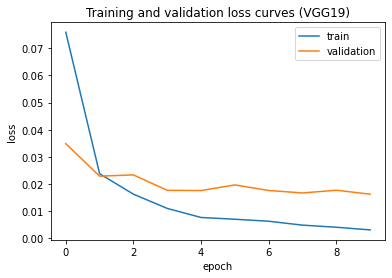

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss curves (VGG19)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

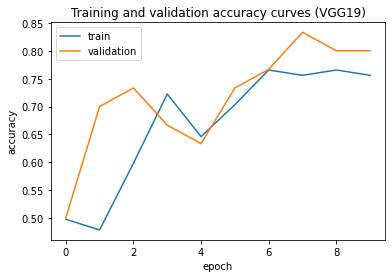

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy curves (VGG19)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


Check model performance on test data

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test,steps=int(100))
y_cnn = model.predict(X_test)

print("")
print(f"Loss : {test_loss * 100}%")
print(f"Accuracy : {test_accuracy * 100}%")

100/100 [==============================] - 104s 982ms/step - loss: 0.0077 - accuracy: 0.8000

Loss : 0.7735187653452158%
Accuracy : 80.0000011920929%


The model performs better after removing the duplicate images.

THE END

--------------------------------------------------------------------------------------------------------------------

In [28]:
import pandas as pd
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# define location of dataset
folder = r'C:\\Users\\prave\\Desktop\\docs\\FA\\New folder\\New folder\\DMT\\Assignment 05 - Neural Networks and Evaluating Results\\New folder\\images\\'

# enumerate files in the directory
data = pd.read_csv(r'C:\Users\prave\Desktop\docs\FA\New folder\New folder\DMT\Assignment 05 - Neural Networks and Evaluating Results\New folder\first_edit.csv')
photos, labels = list(), list()
labeldata=data
for i in labeldata['US Car?']:
    output = 0.0
    if i=='Y': 
        output = 1.0
    labels.append(output)
for file in listdir(folder):
	# load image
	photo = load_img(folder + file, target_size=(200, 200))
	# convert to numpy array
	photo = img_to_array(photo)
	# store
	photos.append(photo)
	
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

(299, 200, 200, 3) (299,)


In [29]:
X = photos
y = labels

X = X / 255
y = y / 255


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1)


In [31]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16


model = Sequential()
model.add(VGG19(weights="imagenet", include_top=False, input_shape=(photos.shape[1], photos.shape[2], 3)))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.layers[-7].trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 6, 6, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               4718848   
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 4)                

In [32]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=1)

Epoch 1/10
7/7 [==============================] - 498s 75s/step - loss: 0.0326 - accuracy: 0.2632 - val_loss: 2.5631e-06 - val_accuracy: 0.0000e+00
Epoch 2/10
7/7 [==============================] - 334s 49s/step - loss: 3.3848e-06 - accuracy: 0.0000e+00 - val_loss: 2.5631e-06 - val_accuracy: 0.0000e+00
Epoch 3/10
7/7 [==============================] - 317s 45s/step - loss: 3.3848e-06 - accuracy: 0.0000e+00 - val_loss: 2.5631e-06 - val_accuracy: 0.0000e+00
Epoch 4/10
7/7 [==============================] - 305s 44s/step - loss: 3.3848e-06 - accuracy: 0.0000e+00 - val_loss: 2.5631e-06 - val_accuracy: 0.0000e+00
Epoch 5/10
7/7 [==============================] - 340s 50s/step - loss: 3.3848e-06 - accuracy: 0.0000e+00 - val_loss: 2.5631e-06 - val_accuracy: 0.0000e+00
Epoch 6/10
7/7 [==============================] - 312s 45s/step - loss: 3.3848e-06 - accuracy: 0.0000e+00 - val_loss: 2.5631e-06 - val_accuracy: 0.0000e+00
Epoch 7/10
7/7 [==============================] - 353s 49s/step - loss: 

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss curves (VGG19)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy curves (VGG19)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [33]:
test_loss, test_accuracy = model.evaluate(X_test, y_test,steps=int(100))
y_cnn = model.predict(X_test)

print("")
print(f"Loss : {test_loss * 100}%")
print(f"Accuracy : {test_accuracy * 100}%")

100/100 [==============================] - 112s 810ms/step - loss: 3.8447e-06 - accuracy: 0.0000e+00

Loss : 0.00038446751204901375%
Accuracy : 0.0%
